# Preparing

## Importing Required Libraries

In [90]:
# import library used for data processing
import pandas as pd
pd.set_option('display.max_columns', None) # to remove the limit of columns shows as output
import numpy as np
import datetime as dt
import copy
from IPython.display import display

# import library for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Importing Data

In [91]:
# sales by state
sales_by_states = pd.read_csv("C:/Users/PC/Downloads/General_Motors-Provide_Insights_to_Chief_in_Electric_and_Hybrid_Vehicles/data/raw_data/electric_vehicle_sales_by_state.csv")
# sales by maker
sales_by_makers = pd.read_csv("C:/Users/PC/Downloads/General_Motors-Provide_Insights_to_Chief_in_Electric_and_Hybrid_Vehicles/data/raw_data/electric_vehicle_sales_by_makers.csv")
# dim_date
dim_date = pd.read_csv("C:/Users/PC/Downloads/General_Motors-Provide_Insights_to_Chief_in_Electric_and_Hybrid_Vehicles/data/raw_data/dim_date.csv")

## Data Understanding

### Electric Vehicle Sales by State
- date: The date on which the data was recorded. Format: DD-MMM-YY. (Data is recorded on a monthly basis)
- state: The name of the state where the sales data is recorded. This indicates the geographical location within India.
- vehicle_category: The category of the vehicle, specifying whether it is a 2-Wheeler or a 4-Wheeler.
- electric_vehicles_sold: The number of electric vehicles sold in the specified state and category on the given date.
- total_vehicles_sold: The total number of vehicles (including both electric and non-electric) sold in the specified state and category on the given date.

In [92]:
# top records
sales_by_states.head()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
0,01-Apr-21,Sikkim,2-Wheelers,0,398
1,01-Apr-21,Sikkim,4-Wheelers,0,361
2,01-May-21,Sikkim,2-Wheelers,0,113
3,01-May-21,Sikkim,4-Wheelers,0,98
4,01-Jun-21,Sikkim,2-Wheelers,0,229


In [93]:
# last record
sales_by_states.tail()

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold
2440,01-Mar-24,Mizoram,2-Wheelers,58,1932
2441,01-Mar-24,DNH and DD,2-Wheelers,25,780
2442,01-Mar-24,Manipur,2-Wheelers,13,1394
2443,01-Mar-24,Andaman & Nicobar Island,2-Wheelers,2,447
2444,01-Mar-24,Nagaland,2-Wheelers,2,1180


In [94]:
# create a new column that contain non electric vehicles sold values
sales_by_states['non_electric_vehicles_sold'] = sales_by_states['total_vehicles_sold'] - sales_by_states['electric_vehicles_sold']

In [95]:
# check data shape
print(f"Shape of the Sales by State Data :{sales_by_states.shape}")

Shape of the Sales by State Data :(2445, 6)


In [96]:
# check the data type of all columns and non values present in each
sales_by_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2445 entries, 0 to 2444
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   date                        2445 non-null   object
 1   state                       2445 non-null   object
 2   vehicle_category            2445 non-null   object
 3   electric_vehicles_sold      2445 non-null   int64 
 4   total_vehicles_sold         2445 non-null   int64 
 5   non_electric_vehicles_sold  2445 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 114.7+ KB


In [97]:
# duplicate check
sales_by_states[sales_by_states.duplicated()]

,date,state,vehicle_category,electric_vehicles_sold,total_vehicles_sold,non_electric_vehicles_sold


In [98]:
# number of unique value in each column
sales_by_states.nunique()

date                            36
state                           35
vehicle_category                 2
electric_vehicles_sold         921
total_vehicles_sold           2225
non_electric_vehicles_sold    2240
dtype: int64

In [99]:
# check unique values in state column
print(f"{sales_by_states['state'].unique()}")
print(f"Number of Unique State in Data is {sales_by_states['state'].unique().shape[0]}")

['Sikkim' 'Andaman & Nicobar Island' 'Arunachal Pradesh' 'Assam'
 'Chhattisgarh' 'DNH and DD' 'Jammu and Kashmir' 'Ladakh' 'Manipur'
 'Meghalaya' 'Mizoram' 'Nagaland' 'Puducherry' 'Tripura' 'Bihar'
 'Chandigarh' 'Delhi' 'Madhya Pradesh' 'Odisha' 'Punjab' 'Uttarakhand'
 'Himachal Pradesh' 'Andaman & Nicobar' 'Haryana' 'Jharkhand'
 'Andhra Pradesh' 'Goa' 'Gujarat' 'Karnataka' 'Kerala' 'Maharashtra'
 'Rajasthan' 'Tamil Nadu' 'Uttar Pradesh' 'West Bengal']
Number of Unique State in Data is 35


In [100]:
# check unique values in vehicle category column
print(f"{sales_by_states['vehicle_category'].unique()}")
print(f"Number of Unique Vehicle Category in Data is {sales_by_states['vehicle_category'].unique().shape[0]}")

['2-Wheelers' '4-Wheelers']
Number of Unique Vehicle Category in Data is 2


In [101]:
# check numerical values in electric vehicle sold column
sales_by_states['electric_vehicles_sold'].describe()

count     2445.000000
mean       845.035174
std       2185.167744
min          0.000000
25%          2.000000
50%         54.000000
75%        534.000000
max      26668.000000
Name: electric_vehicles_sold, dtype: float64

In [102]:
# check numerical values in total vehicles sold column
sales_by_states['total_vehicles_sold'].describe()

count      2445.000000
mean      23402.966053
std       38353.266389
min           1.000000
25%        1158.000000
50%        6098.000000
75%       29396.000000
max      387983.000000
Name: total_vehicles_sold, dtype: float64

### Electric Vehicle Sales by Makers
- date: The date on which the sales data was recorded. Format: DD-MMM-YY. (Data is recorded on a monthly basis)
- vehicle_category: The category of the vehicle, specifying whether it is a 2-Wheeler or a 4-Wheeler.
- maker: The name of the manufacturer or brand of the electric vehicle.
- electric_vehicles_sold: The number of electric vehicles sold by the specified maker in the given category on the given date.

In [103]:
# top records
sales_by_makers.head()

,date,vehicle_category,maker,electric_vehicles_sold
0,01-Apr-21,2-Wheelers,OLA ELECTRIC,0
1,01-Apr-22,2-Wheelers,OKAYA EV,0
2,01-May-21,2-Wheelers,OLA ELECTRIC,0
3,01-Jun-21,2-Wheelers,OLA ELECTRIC,0
4,01-Jul-21,2-Wheelers,OLA ELECTRIC,0


In [104]:
# last records
sales_by_makers.tail()

,date,vehicle_category,maker,electric_vehicles_sold
811,01-Mar-24,2-Wheelers,BGAUSS,3070
812,01-Mar-24,2-Wheelers,BATTRE ELECTRIC,625
813,01-Mar-24,2-Wheelers,KINETIC GREEN,3915
814,01-Mar-24,2-Wheelers,REVOLT,585
815,01-Mar-24,2-Wheelers,OTHERS,10579


In [105]:
# check data shape
print(f"Shape of the Sales by Maker Data : {sales_by_makers.shape}")

Shape of the Sales by Maker Data : (816, 4)


In [106]:
# check the data type of all columns and non values present in each
sales_by_makers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   date                    816 non-null    object
 1   vehicle_category        816 non-null    object
 2   maker                   816 non-null    object
 3   electric_vehicles_sold  816 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 25.6+ KB


In [107]:
# duplicate check
sales_by_makers[sales_by_makers.duplicated()]

,date,vehicle_category,maker,electric_vehicles_sold


In [108]:
# number of unique values in each column
sales_by_makers.nunique()

date                       36
vehicle_category            2
maker                      26
electric_vehicles_sold    603
dtype: int64

In [109]:
# check unique values in vehicle category column
print(f"{sales_by_makers['vehicle_category'].unique()}")
print(f"Number of Unique Vehicle Category in Data is {sales_by_makers['vehicle_category'].unique().shape[0]}")

['2-Wheelers' '4-Wheelers']
Number of Unique Vehicle Category in Data is 2


In [110]:
# check unique values in maker column
print(f"{sales_by_makers['maker'].unique()}")
print(f"Number of Unique Maker in Data is {sales_by_makers['maker'].unique().shape[0]}")

['OLA ELECTRIC' 'OKAYA EV' 'BYD India' 'PCA Automobiles' 'BMW India'
 'Volvo Auto India' 'KIA Motors' 'Mercedes -Benz AG' 'Tata Motors'
 'MG Motor' 'Mahindra & Mahindra' 'Hyundai Motor' 'HERO ELECTRIC'
 'OKINAWA' 'AMPERE' 'ATHER' 'PURE EV' 'TVS' 'REVOLT' 'BAJAJ' 'BEING'
 'JITENDRA' 'OTHERS' 'BGAUSS' 'BATTRE ELECTRIC' 'KINETIC GREEN']
Number of Unique Maker in Data is 26


In [111]:
# check numerical values in electric vehicles sold column
sales_by_makers['electric_vehicles_sold'].describe()

count      816.000000
mean      2531.998775
std       4771.077333
min          0.000000
25%         42.000000
50%        662.000000
75%       2636.500000
max      44630.000000
Name: electric_vehicles_sold, dtype: float64

### Dim Date
- date: The specific date for which the data is relevant. Format: DD-MMM-YY. (Data is recorded on a monthly basis)
- fiscal_year: The fiscal year to which the date belongs. This is useful for financial and business analysis.
- quarter: The fiscal quarter to which the date belongs. Fiscal quarters are typically divided as Q1, Q2, Q3, and Q4.

In [112]:
# top records
dim_date.head()

,date,fiscal_year,quarter
0,01-Apr-21,2022,Q1
1,01-May-21,2022,Q1
2,01-Jun-21,2022,Q1
3,01-Jul-21,2022,Q2
4,01-Aug-21,2022,Q2


In [113]:
# last records
dim_date.tail()

,date,fiscal_year,quarter
31,01-Nov-23,2024,Q3
32,01-Dec-23,2024,Q3
33,01-Jan-24,2024,Q4
34,01-Feb-24,2024,Q4
35,01-Mar-24,2024,Q4


In [114]:
# check the data type of all columns and non values present in each
dim_date.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         36 non-null     object
 1   fiscal_year  36 non-null     int64 
 2   quarter      36 non-null     object
dtypes: int64(1), object(2)
memory usage: 996.0+ bytes


In [115]:
# duplicated check
dim_date[dim_date.duplicated()]

,date,fiscal_year,quarter


In [116]:
# number of unique value in each column
dim_date.nunique()

date           36
fiscal_year     3
quarter         4
dtype: int64

In [117]:
# convert data types of date column to datetimes
dim_date['date'] = pd.to_datetime(dim_date['date'])
# check the latest date
print(f"The latest Date is {dim_date['date'].min()}")
# check the last date
print(f"The last Date is {dim_date['date'].max()}")

The latest Date is 2021-04-01 00:00:00
The last Date is 2024-03-01 00:00:00


C:\Users\PC\AppData\Local\Temp\ipykernel_13080\1075823594.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dim_date['date'] = pd.to_datetime(dim_date['date'])


In [118]:
# check unique values in fiscal year column
print(f"{dim_date['fiscal_year'].unique()}")
print(f"Number of Unique Fiscal Year in Data is {dim_date['fiscal_year'].unique().shape[0]}")

[2022 2023 2024]
Number of Unique Fiscal Year in Data is 3


In [119]:
# check unique values in quarter column
print(f"{dim_date['quarter'].unique()}")
print(f"Number of Unique Quarter in Data is {dim_date['quarter'].unique().shape[0]}")

['Q1' 'Q2' 'Q3' 'Q4']
Number of Unique Quarter in Data is 4


## Data Pre-Processing

### Outlier Processing

Next we'll take a look at any outliers we may need to treat.

#### Create functions for calculating outliers

In [120]:
# functions for calculating outliers
def check_outlier(df, column):
    """_summary_

    Args:
        df (_type_): _description_
        column (_type_): _description_
    """
    # calculate percentage values:
    Q1 = df[column].quantile(0.25)
    Q2 = df[column].quantile(0.5)
    Q3 = df[column].quantile(0.75)
    # calculate the inter quartile range (IQR)
    IQR = Q3 - Q1
    # define lower, median, and upper thresholds to identify outliers 
    lower = Q1 - 1.5 * IQR # the lower threshold, calculated as Q1 minus 1.5 times IQR
    median = Q2 
    upper = Q3 + 1.5 * IQR # the upper threshold, calculated as Q3 plus 1.5 times IQR
    # calculate the percentage of outliers
    # The total number of values greater than upper or less than lower is divided by the total number of values in the column
    # Then multiplied by 100 to get the percentage.
    percent_outliers = round(((df[df[column] > upper].shape[0]) + (df[df[column] < lower].shape[0])) / df.shape[0] * 100, 2)
# Create a DataFrame containing statistical indices
    result = pd.DataFrame({
        'lower_bound': [lower],
        'median': [median],
        'upper_bound': [upper],
        'percent_outliers': [percent_outliers]
    })
    # returns calculated values
    return result

#### Check outlier of sold quantity column in sales_by_states DataFrame

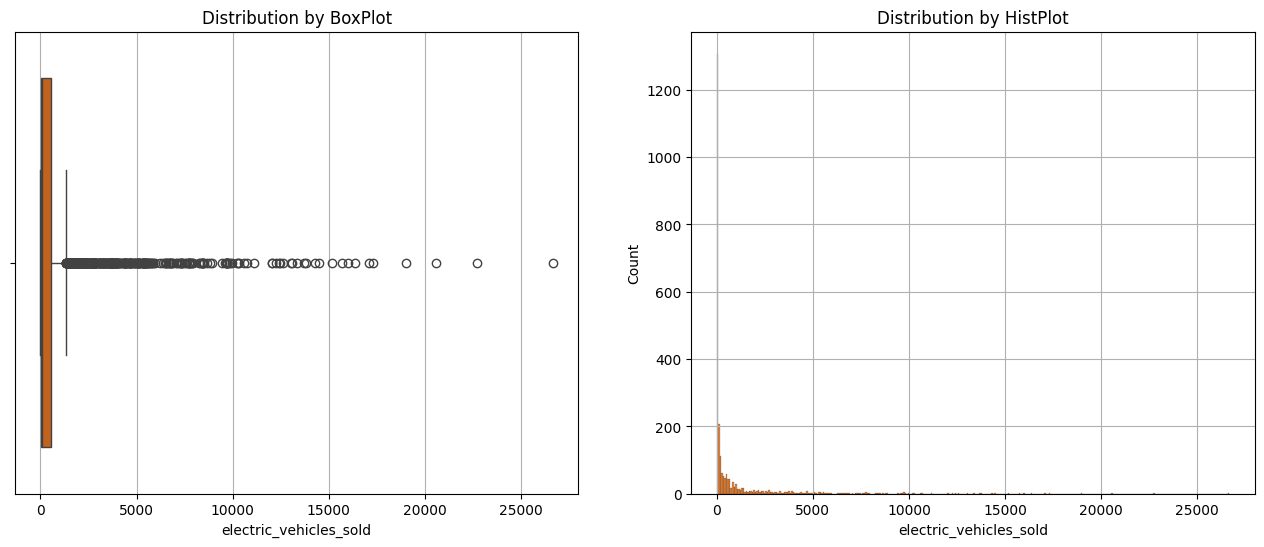

The Skew of Sold Quantity Data is: 4.71


In [121]:
# overview of outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=sales_by_states, x='electric_vehicles_sold', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=sales_by_states, x='electric_vehicles_sold', color='#DC5F00')
plt.title("Distribution by HistPlot")
# plot the chart
plt.show()
# Check the skewness of data in the "sold_quantity" column
print(f"The Skew of Sold Quantity Data is: {round(sales_by_states['electric_vehicles_sold'].skew(), 2)}")

##### Electric Vehicles Sold Outliers Data

In [122]:
# check the outliers, find out the upper bound, lower bound of the electric vehicles sold column
bound_state_sold = check_outlier(sales_by_states, 'electric_vehicles_sold')
# print out the required information
print(f"lower bound is {bound_state_sold['lower_bound'].values[0]}")
print(f"median is {bound_state_sold['median'].values[0]}")
print(f"upper bound is {bound_state_sold['upper_bound'].values[0]}")
print(f"percentage of electric vehicles sold that are outliers is {bound_state_sold['percent_outliers'].values[0]}%")

lower bound is -796.0
median is 54.0
upper bound is 1332.0
percentage of electric vehicles sold that are outliers is 14.72%


The data in the electric vehicles sold column has a lower bound of -796, and an upper bound of 1332.

Based on the data distribution in the previous electric vehicles sold column we learned about, the data is skewed to the right. Therefore, we will only focus on further exploration of the upper bound

Let's move on

In [123]:
# Filter rows with electric vehicles sold quantity greater than upper bound of electric vehicles sold
outliers_state_sold = sales_by_states[sales_by_states['electric_vehicles_sold']>bound_state_sold['upper_bound'].values[0]]
# check how many rows are outliers
print(f"The total number of outliers is {outliers_state_sold.shape[0]}")

The total number of outliers is 360


In [124]:
# count the outlier electric vehicles sold values in each vehicle category
for i in outliers_state_sold['vehicle_category'].unique():
    print(
        f"The number of Electric vehicles sold outliers for {i} vehicles category is {outliers_state_sold[outliers_state_sold['vehicle_category']==i]['vehicle_category'].count()}"
          )

The number of Electric vehicles sold outliers for 4-Wheelers vehicles category is 8
The number of Electric vehicles sold outliers for 2-Wheelers vehicles category is 352


In [125]:
# filter rows with 'vehicles category' is "2-Wheelers"
state_wheeler_2 = sales_by_states[sales_by_states['vehicle_category']=='2-Wheelers']
# statistics values
stats_state_wheelers_2 = state_wheeler_2.groupby(['state']).agg(
    min=('electric_vehicles_sold','min'),
    mean=('electric_vehicles_sold','mean'),
    median=('electric_vehicles_sold','median'),
    max=('electric_vehicles_sold','max')
).reset_index()
# check data after processing
stats_state_wheelers_2

,state,min,mean,median,max
0,Andaman & Nicobar,2,2.000000,2.0,2
1,Andaman & Nicobar Island,0,1.000000,0.0,10
2,Andhra Pradesh,201,2058.305556,1909.5,7057
3,Arunachal Pradesh,0,0.111111,0.0,2
4,Assam,0,165.638889,172.0,767
5,Bihar,8,833.888889,768.0,2584
6,Chandigarh,0,101.500000,98.5,362
7,Chhattisgarh,6,1441.361111,1378.5,3880
8,DNH and DD,0,7.805556,5.0,31
9,Delhi,0,2477.166667,2497.5,5380


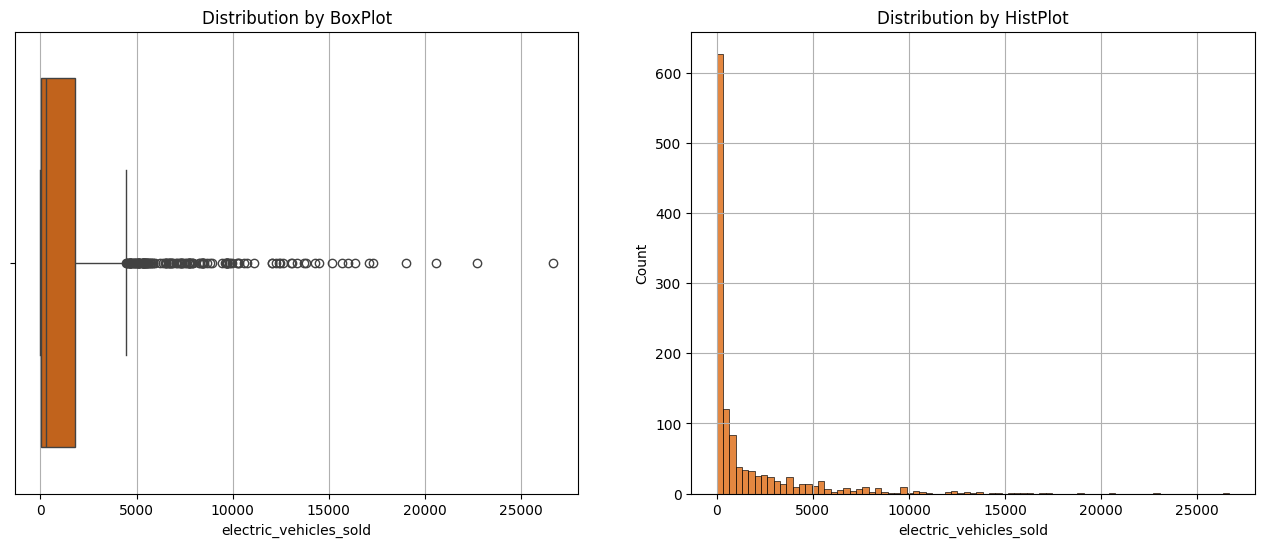

The Skew of 2-Wheelers Sold Data is: 3.27


In [126]:
# overview of outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=state_wheeler_2, x='electric_vehicles_sold', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=state_wheeler_2, x='electric_vehicles_sold', color='#DC5F00')
plt.title("Distribution by HistPlot")
# plot the chart
plt.show()
# Check the skewness of data in the "sold_quantity" column
print(f"The Skew of 2-Wheelers Sold Data is: {round(state_wheeler_2['electric_vehicles_sold'].skew(), 2)}")

In [127]:
# check the outliers, find out the upper bound, lower bound of the electric vehicles sold column
bound_state_wheelers_2_sold = check_outlier(state_wheeler_2, 'electric_vehicles_sold')
# print out the required information
print(f"lower bound is {bound_state_wheelers_2_sold['lower_bound'].values[0]}")
print(f"median is {bound_state_wheelers_2_sold['median'].values[0]}")
print(f"upper bound is {bound_state_wheelers_2_sold['upper_bound'].values[0]}")
print(f"percentage of electric vehicles sold that are outliers is {bound_state_wheelers_2_sold['percent_outliers'].values[0]}%")

lower bound is -2663.0
median is 282.0
upper bound is 4457.0
percentage of electric vehicles sold that are outliers is 11.28%


In [128]:
# Filter rows with electric vehicles sold quantity greater than upper bound of electric vehicles sold
outliers_state_wheelers_2_sold = state_wheeler_2[state_wheeler_2['electric_vehicles_sold']>bound_state_wheelers_2_sold['upper_bound'].values[0]]
# check how many rows are outliers
print(f"The total number of outliers is {outliers_state_wheelers_2_sold.shape[0]}")

The total number of outliers is 138


C:\Users\PC\AppData\Local\Temp\ipykernel_13080\2133925084.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  outliers_state_wheelers_2['date'] = pd.to_datetime(outliers_state_wheelers_2['date'])


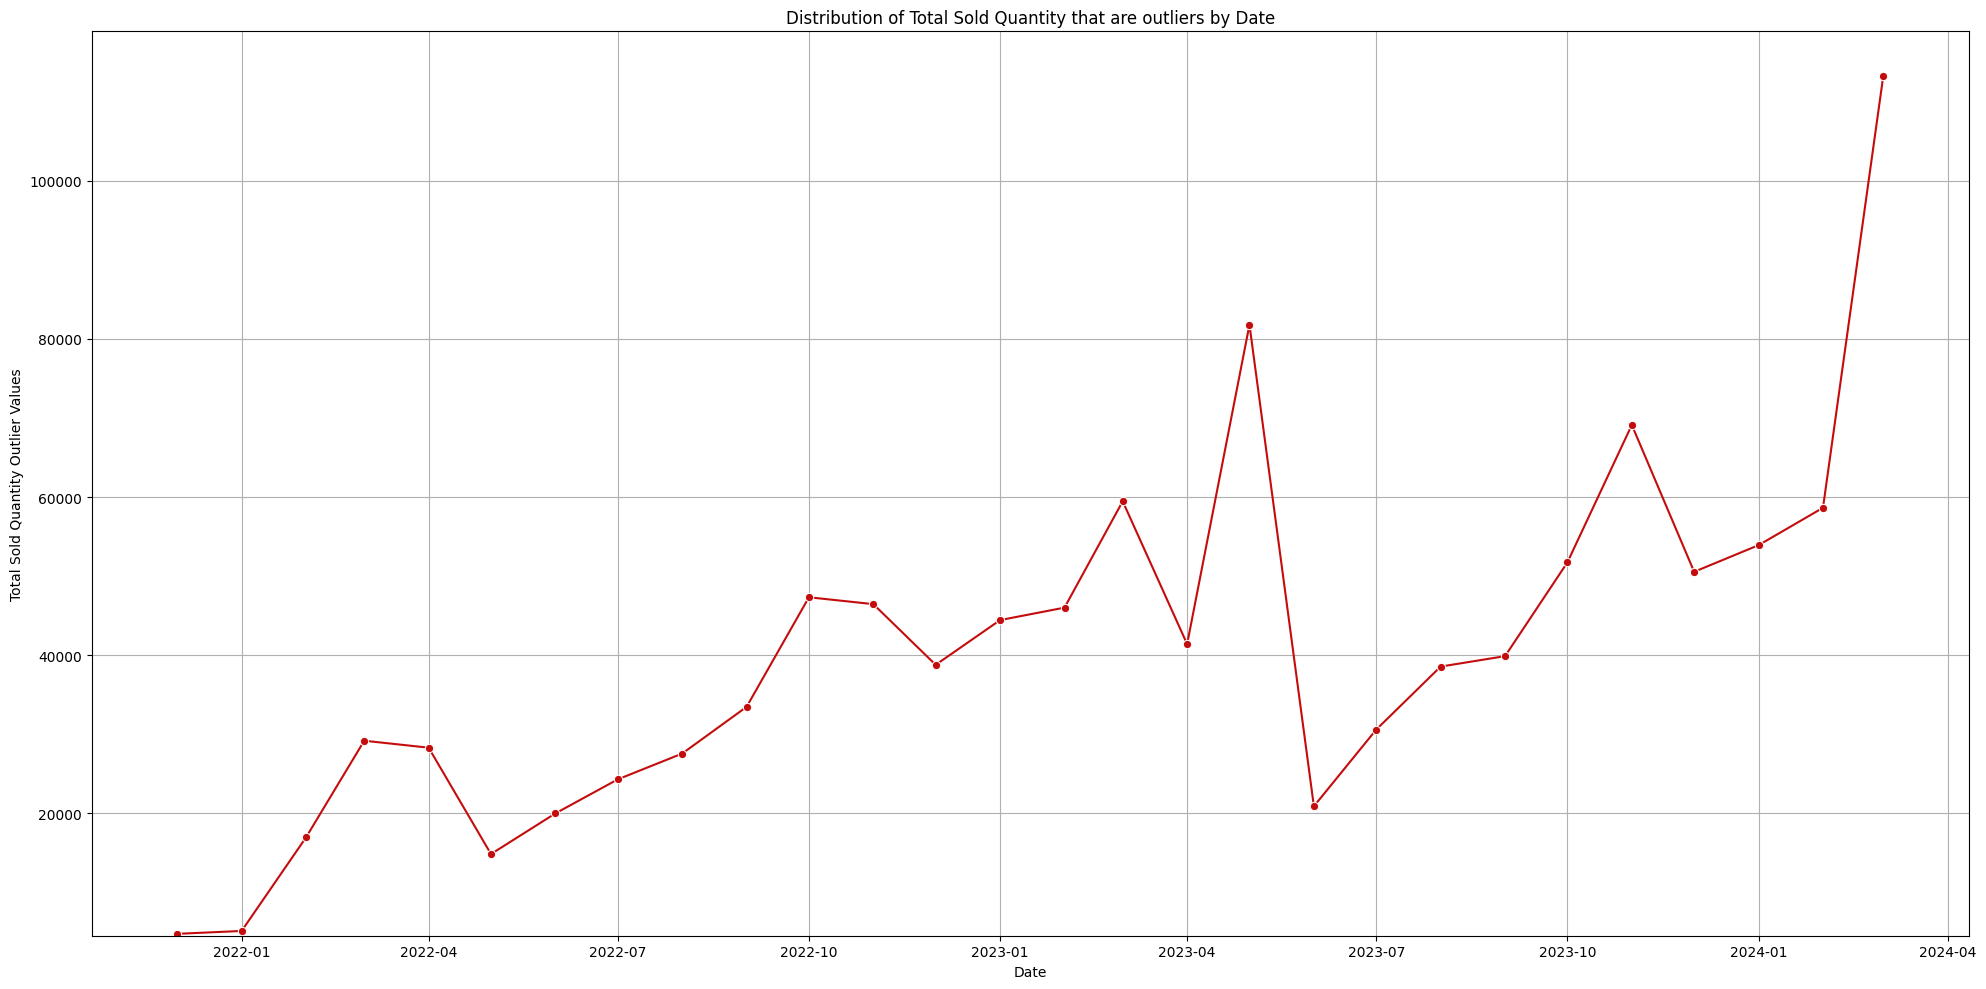

In [129]:
# groupby 'electric_vehicles_sold' by 'date',and 'state'
outliers_state_wheelers_2 = outliers_state_wheelers_2_sold.groupby(['date']).agg(total_sold=('electric_vehicles_sold','sum')).reset_index()
outliers_state_wheelers_2['date'] = pd.to_datetime(outliers_state_wheelers_2['date'])
# set the size of the figure
plt.figure(figsize=(20,10))
# plot the line chart for the column
ax = sns.lineplot(data=outliers_state_wheelers_2, x='date', y='total_sold', marker='o', color='#C40C0C')
# set the line chart for the column
plt.title("Distribution of Total Sold Quantity that are outliers by Date")
plt.xlabel('Date')
plt.ylabel('Total Sold Quantity Outlier Values')
plt.ylim(outliers_state_wheelers_2['total_sold'].min()*0.95, outliers_state_wheelers_2['total_sold'].max()*1.05) # set x-ticks with labels
plt.grid()
# Adjust layout
plt.tight_layout()
# show the plot
plt.show()

#### Check outlier of sold quantity column in sales_by_makers DataFrame

##### Electric Vehicles Sold Outliers Data

In [130]:
# check the outliers, find out the upper bound, lower bound of the electric vehicles sold column
bound_maker_sold = check_outlier(sales_by_makers, 'electric_vehicles_sold')
# print out the required information
print(f"lower bound is {bound_maker_sold['lower_bound'].values[0]}")
print(f"median is {bound_maker_sold['median'].values[0]}")
print(f"upper bound is {bound_maker_sold['upper_bound'].values[0]}")
print(f"percentage of electric vehicles sold that are outliers is {bound_maker_sold['percent_outliers'].values[0]}%")

lower bound is -3849.75
median is 662.0
upper bound is 6528.25
percentage of electric vehicles sold that are outliers is 12.75%


The data in the electric vehicles sold column has a lower bound of -796, and an upper bound of 1332.

Based on the data distribution in the previous electric vehicles sold column we learned about, the data is skewed to the right. Therefore, we will only focus on further exploration of the upper bound

Let's move on

In [131]:
# Filter rows with electric vehicles sold quantity greater than upper bound of electric vehicles sold
outliers_maker_sold = sales_by_makers[sales_by_makers['electric_vehicles_sold']>bound_maker_sold['upper_bound'].values[0]]
# check how many rows are outliers
print(f"The total number of outliers is {outliers_maker_sold.shape[0]}")

The total number of outliers is 104


In [132]:
# count the outlier electric vehicles sold values in each vehicle category
for i in outliers_maker_sold['vehicle_category'].unique():
    print(
        f"The number of Electric vehicles sold outliers for {i} vehicles category is {outliers_maker_sold[outliers_maker_sold['vehicle_category']==i]['vehicle_category'].count()}"
          )

The number of Electric vehicles sold outliers for 4-Wheelers vehicles category is 1
The number of Electric vehicles sold outliers for 2-Wheelers vehicles category is 103


In [133]:
# filter rows with 'vehicles category' is "2-Wheelers"
maker_wheeler_2 = sales_by_makers[sales_by_makers['vehicle_category']=='2-Wheelers']
# statistics values
stats_maker_wheelers_2 = maker_wheeler_2.groupby(['maker']).agg(
    min=('electric_vehicles_sold','min'),
    mean=('electric_vehicles_sold','mean'),
    median=('electric_vehicles_sold','median'),
    max=('electric_vehicles_sold','max')
).reset_index()
# check data after processing
stats_maker_wheelers_2

,maker,min,mean,median,max
0,AMPERE,147,4646.500000,4398.5,12446
1,ATHER,160,5679.138889,5828.0,17012
2,BAJAJ,20,4044.611111,2578.5,17716
3,BATTRE ELECTRIC,82,403.416667,269.5,1185
4,BEING,54,766.333333,893.0,1422
5,BGAUSS,189,1254.250000,1178.5,3070
6,HERO ELECTRIC,170,4733.166667,5695.0,13652
7,JITENDRA,13,518.250000,528.5,1256
8,KINETIC GREEN,201,798.750000,523.0,3915
9,OKAYA EV,0,1126.500000,1015.0,3831


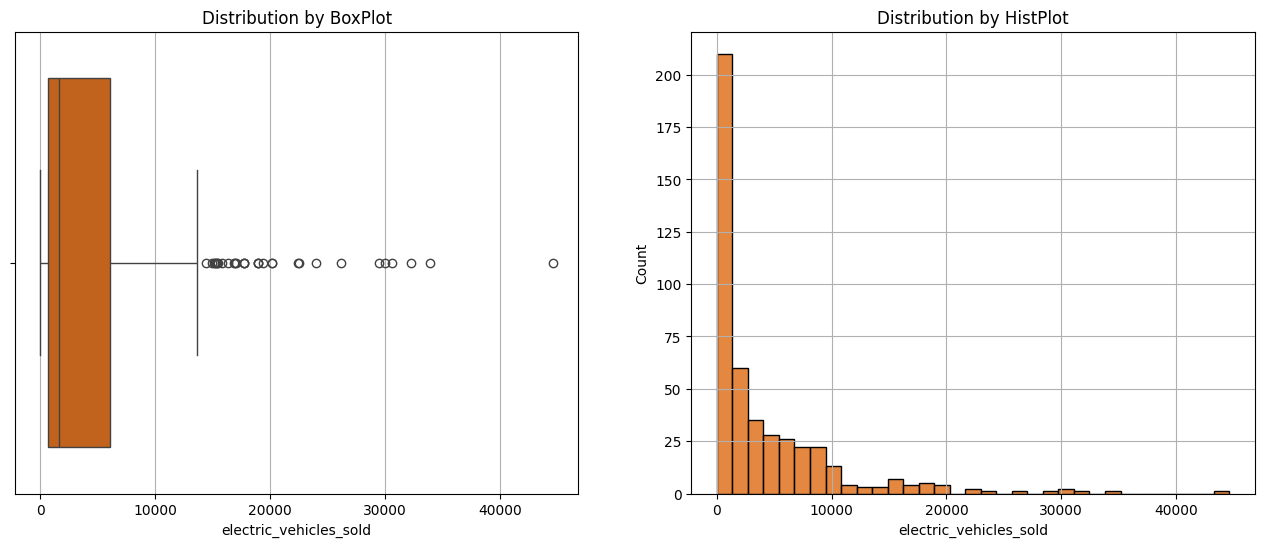

The Skew of 2-Wheelers Sold Data is: 2.76


In [134]:
# overview of outliers
# set the size of chart
plt.figure(figsize=(16,6))
# first subplot by box plot
plt.subplot(1,2,1)
plt.grid()
sns.boxplot(data=maker_wheeler_2, x='electric_vehicles_sold', color='#DC5F00')
plt.title("Distribution by BoxPlot")
# second subplot by hist plot
plt.subplot(1,2,2)
plt.grid()
sns.histplot(data=maker_wheeler_2, x='electric_vehicles_sold', color='#DC5F00')
plt.title("Distribution by HistPlot")
# plot the chart
plt.show()
# Check the skewness of data in the "sold_quantity" column
print(f"The Skew of 2-Wheelers Sold Data is: {round(maker_wheeler_2['electric_vehicles_sold'].skew(), 2)}")

In [135]:
# check the outliers, find out the upper bound, lower bound of the electric vehicles sold column
bound_maker_wheelers_2_sold = check_outlier(maker_wheeler_2, 'electric_vehicles_sold')
# print out the required information
print(f"lower bound is {bound_maker_wheelers_2_sold['lower_bound'].values[0]}")
print(f"median is {bound_maker_wheelers_2_sold['median'].values[0]}")
print(f"upper bound is {bound_maker_wheelers_2_sold['upper_bound'].values[0]}")
print(f"percentage of electric vehicles sold that are outliers is {bound_maker_wheelers_2_sold['percent_outliers'].values[0]}%")

lower bound is -7382.25
median is 1620.0
upper bound is 14081.75
percentage of electric vehicles sold that are outliers is 6.8%


In [136]:
# Filter rows with electric vehicles sold quantity greater than upper bound of electric vehicles sold
outliers_maker_wheelers_2_sold = maker_wheeler_2[maker_wheeler_2['electric_vehicles_sold']>bound_maker_wheelers_2_sold['upper_bound'].values[0]]
# check how many rows are outliers
print(f"The total number of outliers is {outliers_maker_wheelers_2_sold.shape[0]}")

The total number of outliers is 31


C:\Users\PC\AppData\Local\Temp\ipykernel_13080\1559895754.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  outliers_maker_wheelers_2['date'] = pd.to_datetime(outliers_maker_wheelers_2['date'])


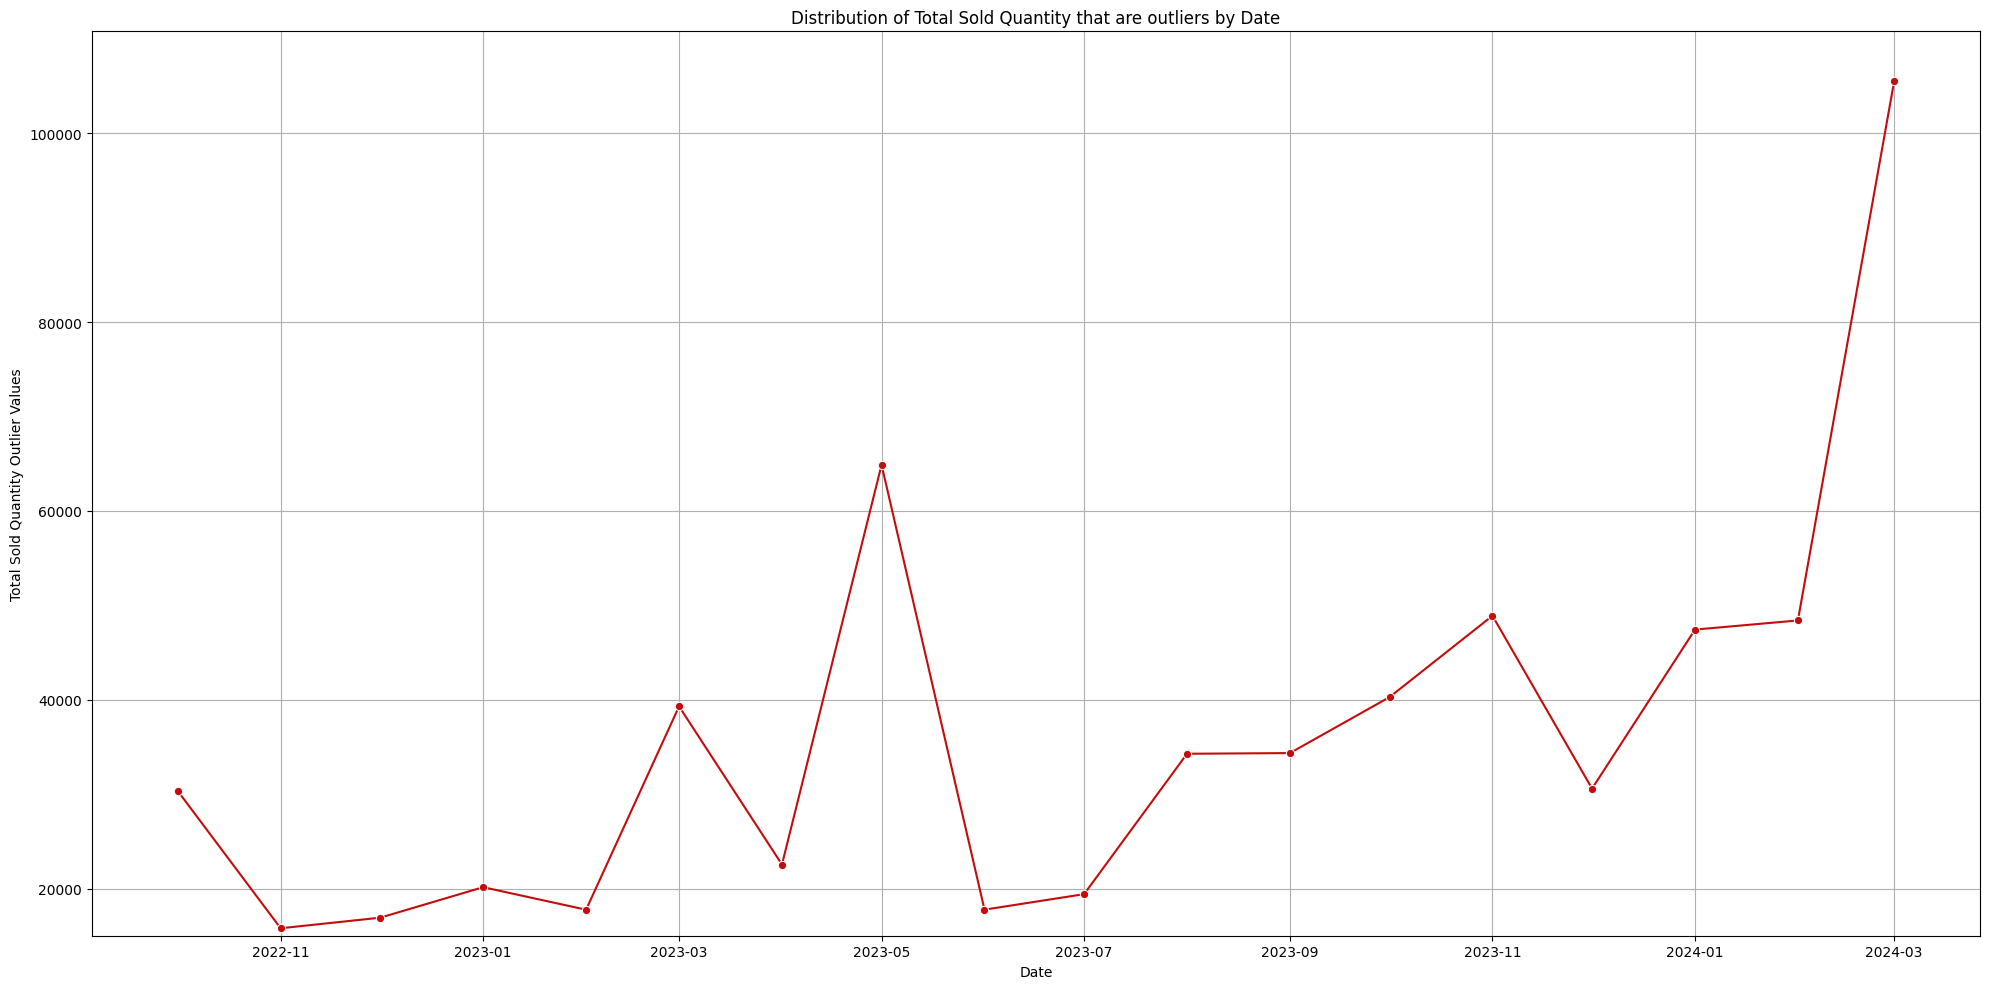

In [137]:
# groupby 'electric_vehicles_sold' by 'date',and 'state'
outliers_maker_wheelers_2 = outliers_maker_wheelers_2_sold.groupby(['date']).agg(total_sold=('electric_vehicles_sold','sum')).reset_index()
outliers_maker_wheelers_2['date'] = pd.to_datetime(outliers_maker_wheelers_2['date'])
# set the size of the figure
plt.figure(figsize=(20,10))
# plot the line chart for the column
ax = sns.lineplot(data=outliers_maker_wheelers_2, x='date', y='total_sold', marker='o', color='#C40C0C')
# set the line chart for the column
plt.title("Distribution of Total Sold Quantity that are outliers by Date")
plt.xlabel('Date')
plt.ylabel('Total Sold Quantity Outlier Values')
plt.ylim(outliers_maker_wheelers_2['total_sold'].min()*0.95, outliers_maker_wheelers_2['total_sold'].max()*1.05) # set x-ticks with labels
plt.grid()
# Adjust layout
plt.tight_layout()
# show the plot
plt.show()

## Export Processed Data

In [138]:
# sales by states
#sales_by_states.to_csv("C:/Users/PC/Downloads/General_Motors-Provide_Insights_to_Chief_in_Electric_and_Hybrid_Vehicles/data/processed_data/electric_vehicle_sales_by_state.csv")
# sales by makers
#sales_by_makers.to_csv("C:/Users/PC/Downloads/General_Motors-Provide_Insights_to_Chief_in_Electric_and_Hybrid_Vehicles/data/processed_data/electric_vehicle_sales_by_makers.csv")

# Next Steps